In [2]:
import numpy as np
import matplotlib.pyplot as plt
from ROOT import TFile, TChain, TTree, TCanvas

In [3]:
mj_filepath = "/pnfs/icarus/scratch/users/ascarpel/trigger/6105/ana/" #for majority trigger
mb_filepath = "/pnfs/icarus/scratch/users/ascarpel/trigger/6031/ana/" #for minbias

mj_geotree                = TChain("flashana/geotree")
mj_eventstree             = TChain("flashana/eventstree")
mj_opflashCryoE_flashtree = TChain("flashana/opflashCryoE_flashtree/")
mj_opflashCryoE_ophittree = TChain("flashana/opflashCryoE_ophittree")
mj_opflashCryoW_flashtree = TChain("flashana/opflashCryoW_flashtree")
mj_opflashCryoW_ophittree = TChain("flashana/opflashCryoW_ophittree")

mb_geotree                = TChain("flashana/geotree")
mb_eventstree             = TChain("flashana/eventstree")
mb_opflashCryoE_flashtree = TChain("flashana/opflashCryoE_flashtree")
mb_opflashCryoE_ophittree = TChain("flashana/opflashCryoE_ophittree")
mb_opflashCryoW_flashtree = TChain("flashana/opflashCryoW_flashtree")
mb_opflashCryoW_ophittree = TChain("flashana/opflashCryoW_ophittree")

mj_filenames = []
with open(mj_filepath+"filesana.list") as f:
    mj_filenames  = f.readlines()
mj_filenames = [x.strip() for x in mj_filenames] 

mb_filenames = []
with open(mb_filepath+"filesana.list") as f:
    mb_filenames = f.readlines()

for mj_filename in mj_filenames:
    mj_geotree.Add(mj_filename)
    mj_eventstree.Add(mj_filename)
    mj_opflashCryoE_flashtree.Add(mj_filename)
    mj_opflashCryoE_ophittree.Add(mj_filename)
    mj_opflashCryoW_flashtree.Add(mj_filename)
    mj_opflashCryoW_ophittree.Add(mj_filename)
    break # for testing purposes

for mb_filename in mb_filenames:
    mb_geotree.Add(mj_filename)
    mb_eventstree.Add(mj_filename)
    mb_opflashCryoE_flashtree.Add(mj_filename)
    mb_opflashCryoE_ophittree.Add(mj_filename)
    mb_opflashCryoW_flashtree.Add(mj_filename)
    mb_opflashCryoW_ophittree.Add(mj_filename)
    break # for testing purposes


In [4]:
print(mj_geotree.GetEntries())
print(mj_eventstree.GetEntries())
print(mj_opflashCryoE_flashtree.GetEntries())
print(mj_opflashCryoE_ophittree.GetEntries())
print(mj_opflashCryoW_flashtree.GetEntries())
print(mj_opflashCryoW_ophittree.GetEntries())

1
50
0
346417
810
392865


Error in <TChain::LoadTree>: Cannot find tree with name flashana/opflashCryoE_flashtree/ in file /pnfs/icarus/scratch/users/ascarpel/trigger/6105/ana/21850282_0/Supplemental-data_dl4_fstrmBNB_run6105_1_20210625T204511_20210625T230037_stage0-e7135235-96ee-4a35-96ac-7ed33068c6cf-opreco.root


In [5]:
print(mb_geotree.GetEntries())
print(mb_eventstree.GetEntries())
print(mb_opflashCryoE_flashtree.GetEntries())
print(mb_opflashCryoE_ophittree.GetEntries())
print(mb_opflashCryoW_flashtree.GetEntries())
print(mb_opflashCryoW_ophittree.GetEntries())

1
50
758
346417
810
392865


In [6]:
# ok, figuring out drawing
# play with min bias sample for this part, since it seems "less buggy"

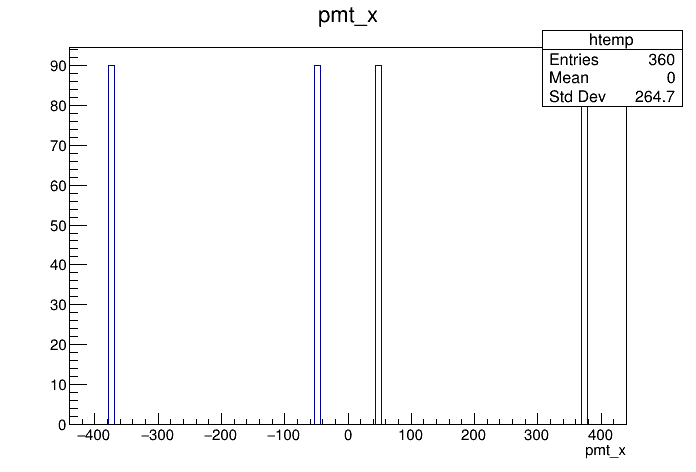

In [7]:
c0 = TCanvas()
mb_geotree.Draw("pmt_x")
c0.Draw()

In [11]:
#for pmt in mb_pmts: print(pmt.get_name()) # some debugging

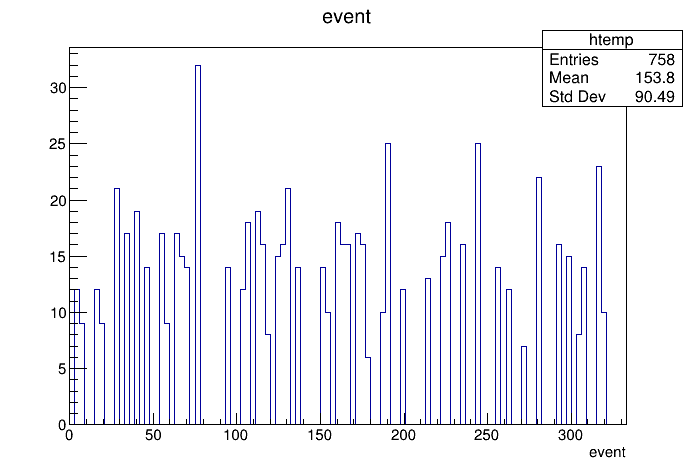

In [12]:
c1 = TCanvas()
mb_opflashCryoE_flashtree.Draw("event")
c1.Draw()

In [37]:
"""
developing OOP approach to this here, then putting it in a separate
.py module
"""

class PMT():
    
    def __init__(self,paramters):
        
        self.x = paramters[0]
        self.y = paramters[1]
        self.z = paramters[2]
        
    def GetPosition(self):
        
        return(x,y,z)


class Ophit:
    
    def __init__(self,parameters):
        
        self.run          = parameters[0]
        self.event            = parameters[1]
        self.timestamp      = parameters[2]
        self.flash_id       = parameters[3]
        self.channel_id     = parameters[4]
        self.integral       = parameters[5]
        self.amplitude      = parameters[6]
        self.start_time     = parameters[7]
        self.abs_start_time = parameters[8]
        self.pe             = parameters[9]
        self.width          = parameters[10]
        self.fast_to_total  = parameters[11]
        
    def GetPosition(self, pmt_directory):
        
        """
        returns a tuple with x, y, and z coordinate associated with an
        optical hit
        """
        
        return(pmt_directory[self.channel_id].GetPosition())
    
class Flash():
    
    def __init__(self,parameters):
        
        self.ophits = []
        
        self.run                = parameters[0]
        self.event              = parameters[1]
        self.timestamp          = parameters[2]
        self.flash_id           = parameters[3]
        self.multiplicity       = parameters[4]
        self.multiplicity_right = parameters[5]
        self.multiplicity_left  = parameters[6]
        self.sum_pe             = parameters[7]
        self.sum_pe_right       = parameters[8]
        self.sum_pe_left        = parameters[9]
        self.flash_time         = parameters[10]
        self.flash_y            = parameters[11]
        self.flash_width_y      = parameters[12]
        self.flash_z            = parameters[13]
        self.flash_width_z      = parameters[14]
        
    def AddOpHit(self,ophit):
        
        self.ophits.append(ophit)
        
    def GetOpHits(self):
        
        return self.ophits
    
class Event():
    
    def __init__(self,parameters):
        
        self.flashes = {}
        
        self.run             = parameters[0]
        self.event           = parameters[1]
        self.timestamp       = parameters[2]
        self.nflashes        = parameters[3]
        self.nophits         = parameters[4]
        self.beam_gate_start = parameters[5]
        self.beam_gate_width = parameters[6]
        self.beam_type       = parameters[7]
        
    def AddFlash(self,flash):
        
        self.flashes[flash.flash_id]=flash
        
    def GetFlashes(self):
        
        return self.flashes

In [50]:
mb_pmts    = {}
mb_events  = {}

for record in mb_geotree:
    for channel in range(len(record.pmt_x)):
        mb_pmts[channel+1] = PMT((record.pmt_x,
                                  record.pmt_y,
                                  record.pmt_z))

for event in mb_eventstree:
    mb_events[event.event]=Event([event.run,
                                  event.event,
                                  event.timestamp,
                                  event.nflashes,
                                  event.nophits,
                                  event.beam_gate_start,
                                  event.beam_gate_width,
                                  event.beam_type])
    #print(event.event)
    
for flash in mb_opflashCryoE_flashtree:
    _flash = Flash([flash.run,
                    flash.event,
                    flash.timestamp,
                    flash.flash_id,
                    flash.multiplicity,
                    flash.multiplicity_right,
                    flash.multiplicity_left,
                    flash.sum_pe,
                    flash.sum_pe_right,
                    flash.sum_pe_left,
                    flash.flash_time,
                    flash.flash_y,
                    flash.flash_width_y,
                    flash.flash_z,
                    flash.flash_width_z])
    mb_events[flash.event].AddFlash(_flash)


for flash in mb_opflashCryoW_flashtree:
    _flash = Flash([flash.run,
                    flash.event,
                    flash.timestamp,
                    flash.flash_id,
                    flash.multiplicity,
                    flash.multiplicity_right,
                    flash.multiplicity_left,
                    flash.sum_pe,
                    flash.sum_pe_right,
                    flash.sum_pe_left,
                    flash.flash_time,
                    flash.flash_y,
                    flash.flash_width_y,
                    flash.flash_z,
                    flash.flash_width_z])
    mb_events[flash.event].AddFlash(_flash)
    
for ophit in mb_opflashCryoE_ophittree:
    
    _ophit = Ophit([ophit.run,
                    ophit.event,
                    ophit.timestamp,
                    ophit.flash_id,
                    ophit.channel_id,
                    ophit.integral,
                    ophit.amplitude,
                    ophit.start_time,
                    ophit.abs_start_time,
                    ophit.pe,
                    ophit.width,
                    ophit.fast_to_total])
    
    #print(ophit.event)
    #((mb_events[_ophit.event]).GetFlashes())[ophit.flash_id] = _ophit
    
    #print(_ophit.event)
    (((mb_events[_ophit.event]).GetFlashes())[_ophit.flash_id]).AddOpHit(_ophit)

for ophit in mb_opflashCryoW_ophittree:
    
    _ophit = Ophit([ophit.run,
                    ophit.event,
                    ophit.timestamp,
                    ophit.flash_id,
                    ophit.channel_id,
                    ophit.integral,
                    ophit.amplitude,
                    ophit.start_time,
                    ophit.abs_start_time,
                    ophit.pe,
                    ophit.width,
                    ophit.fast_to_total])
    
    (((mb_events[_ophit.event]).GetFlashes())[_ophit.flash_id]).AddOpHit(_ophit)


In [57]:
# now I need to write tests (to make sure that everything here is good!)

for event_number, event in mb_events.items():
    print("-------------------------------------------")
    print(event.event)
    print(len(event.GetFlashes()))
    for flash_number, flash in event.GetFlashes().items():
        print(len(flash.GetOpHits()))

-------------------------------------------
3
18
1231
1006
1058
1214
924
1088
996
766
1194
839
839
1058
596
578
332
235
142
416
-------------------------------------------
7
17
1194
1212
976
1163
804
836
885
1020
1214
382
438
558
240
428
366
254
208
-------------------------------------------
15
18
656
834
1158
895
1106
1108
488
736
905
549
879
470
183
232
277
187
284
615
-------------------------------------------
19
15
1091
1179
1135
1307
906
891
1033
1036
1107
628
410
515
476
303
491
-------------------------------------------
27
21
1162
1125
990
941
1204
900
660
630
528
632
385
581
542
332
557
257
304
222
430
251
247
-------------------------------------------
35
17
1431
1109
964
1140
1122
1082
800
1065
1159
1033
945
880
774
618
309
828
267
-------------------------------------------
39
19
686
1011
1201
1151
1104
923
1057
1013
1067
1043
1220
862
315
653
301
367
255
136
163
-------------------------------------------
47
15
1039
1229
707
887
939
1194
985
944
1088
1045
810
882
756
102